In [2]:


# python unlearn.py -sp 10 -a --seed 0 -hd 32 -od 64 -ne 5 --N_train 200 --N_test 100

from pathlib import Path

# import libraries
import os
import argparse
import torch
import pickle
import wandb
from datetime import datetime

# own functions
from utils import save_parameters, random_seed, TimeTaking


# pytorch device
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"device: {DEVICE}")


seed = 1
dataset_name = 'PTB_XL'
N_train = 3000
N_test = 2000
normalize = False
hidden_dim = 32
output_dim = 64
classifier = 'logistic'
n_epochs = 15
batch_size = 8
learning_rate = 1e-3
p = 0.5
grad_clip = None
alpha = 0.5
sensitive_points = 256


from utils import random_seed
random_seed(seed)

data_path = os.path.join(Path.cwd(), 'PTB_XL')

results_path = 'results'
final_path = 'amnesiac_unlearning'
dataset_name = 'PTB_XL'

save_path = os.path.join(results_path, dataset_name, final_path)



if dataset_name == 'PTB_XL':
    from dataset import PTB_XL_v2
    dataset = PTB_XL_v2(data_path)
else:
    from dataset import AEON_DATA_v2
    # UCR and UEA datasets
    dataset = AEON_DATA_v2(dataset_name)



from utils import train_test_dataset
train_dataset, test_dataset, D = train_test_dataset(dataset=dataset,
                                                    test_proportion=0.3,
                                                    train_size=N_train,
                                                    test_size=N_test,
                                                    seed=seed,
                                                    return_stand=normalize)
from amnesiac import AmnesiacTraining
model = AmnesiacTraining(input_dim=D,
                            hidden_dim=hidden_dim,
                            output_dim=output_dim,
                            p=p,
                            device=DEVICE,
                            sensitive_points=train_dataset.indices[0:sensitive_points])


model.load(save_path, DEVICE)


device: cpu


In [3]:
iter_ = iter(dataset)

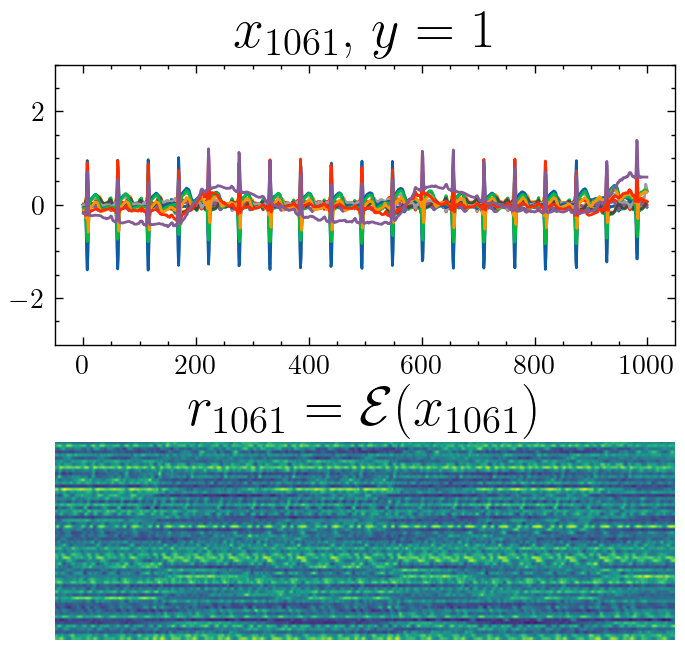

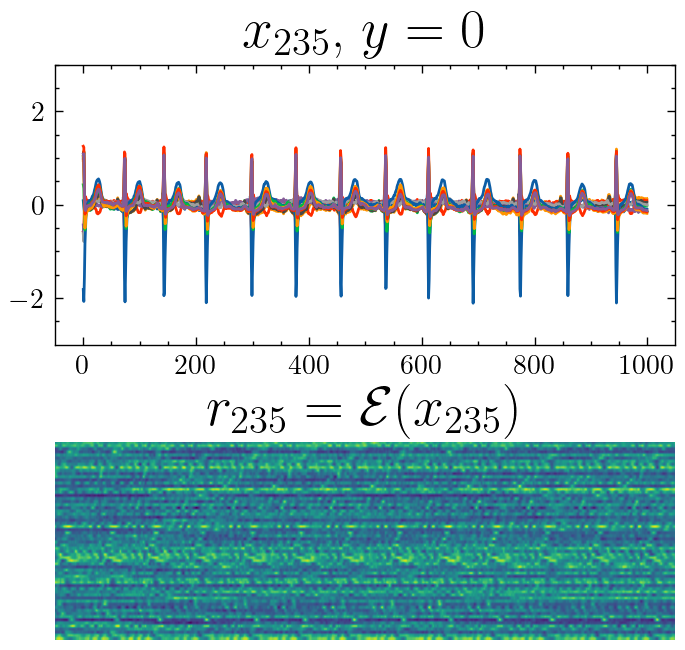

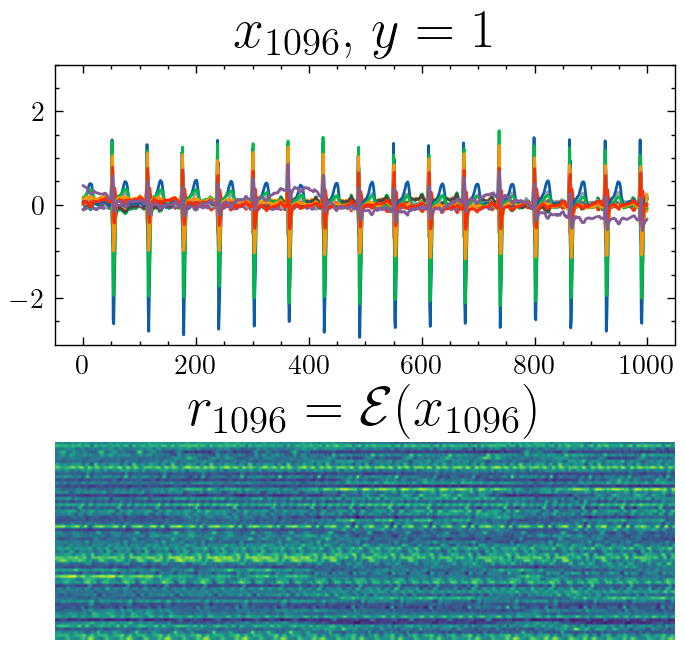

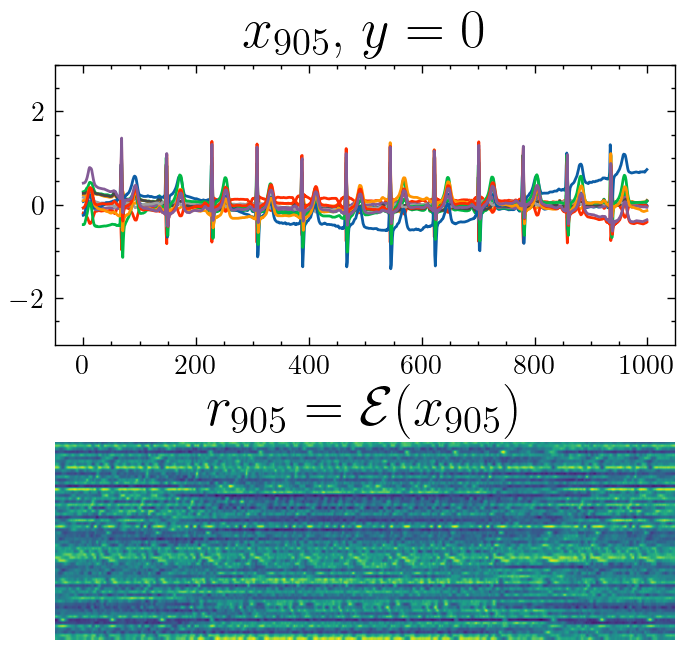

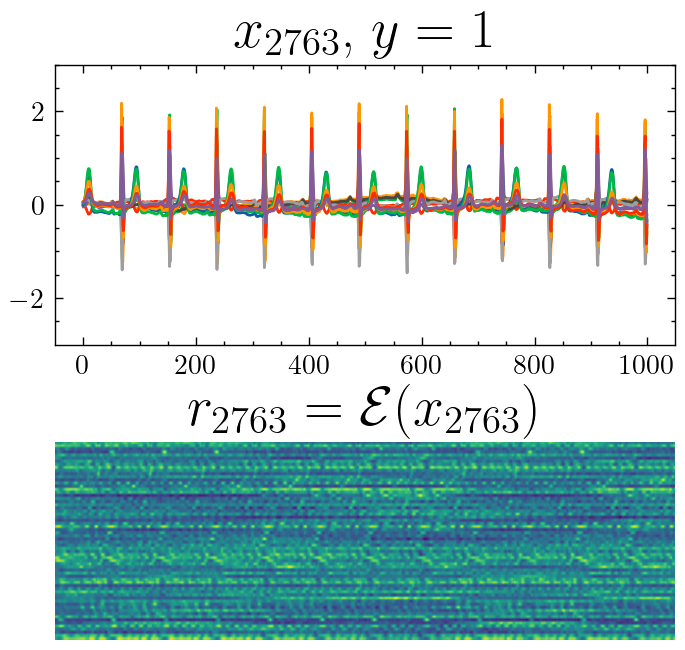

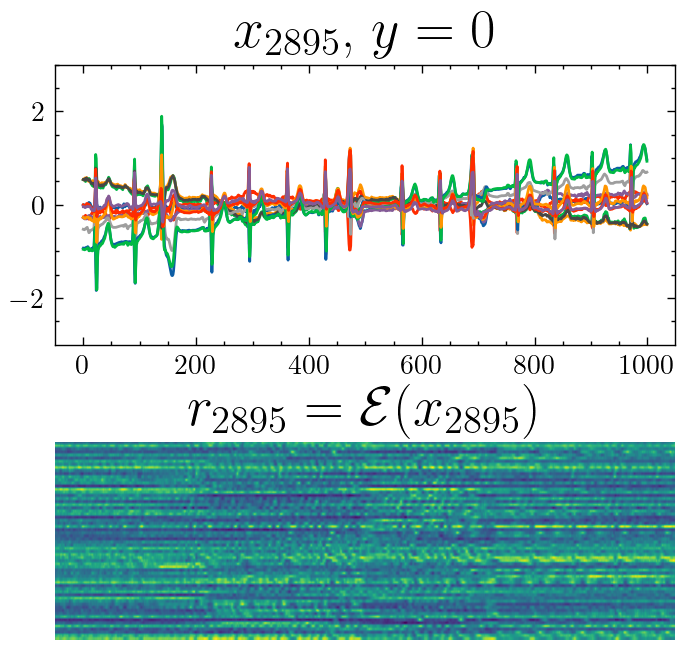

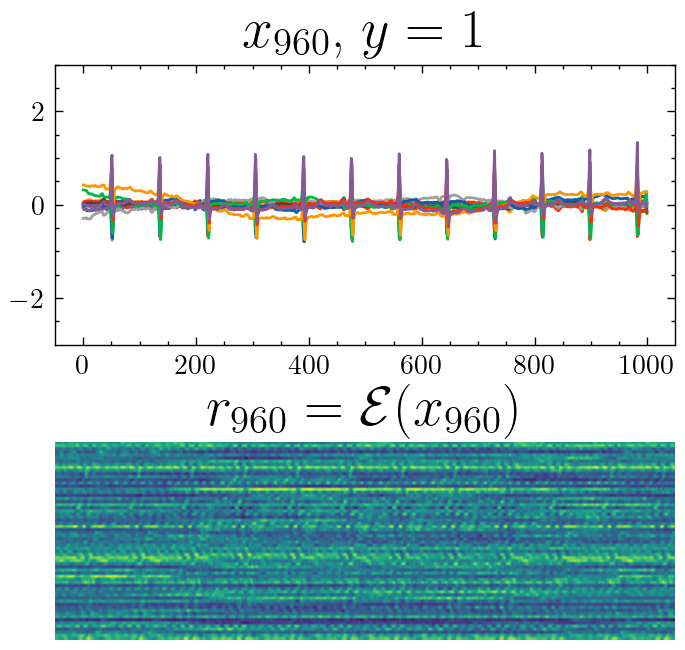

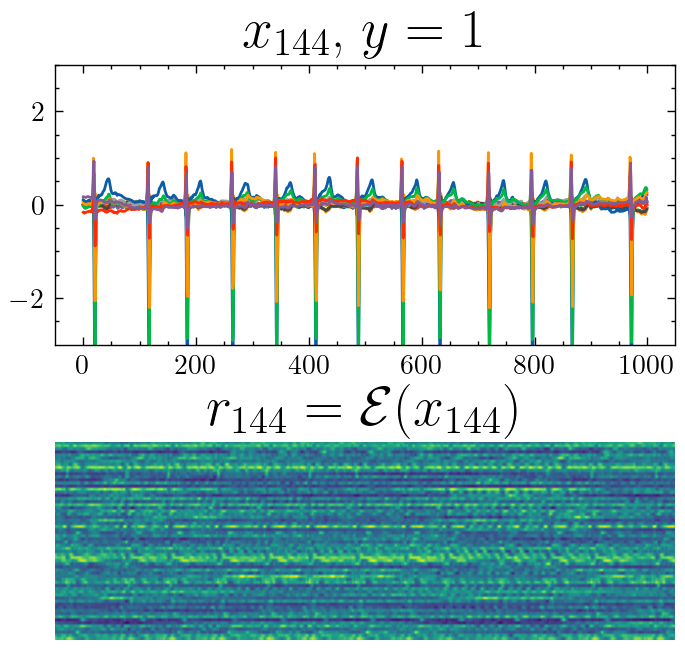

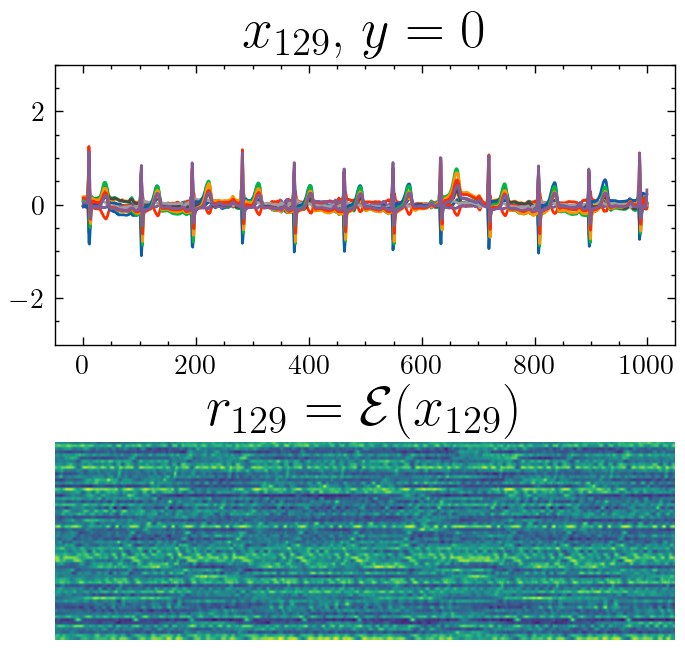

In [6]:
import matplotlib.pyplot as plt

from utils import cool_plots

import numpy as np

cool_plots()


N_images = 9

chosen = [16,17,18, 23, 44, 49, 63, 68, 79, 102, 109, 124, 127, 134, 179, 214]

np.random.seed(1)

indices = np.random.choice(3000, size=N_images)

for i in range(len(indices)):
    fig, ax = plt.subplots(2,1, figsize=(4,4))

    X, y, _ = dataset[indices[i]]

    X_hat = model.model(X.float()[None,:,:])


    ax[0].plot(X)
    ax[0].set_title('$x_{' + str(indices[i]) + '}$,  ' + '$y=' + str(y.item()) + '$',
                    fontsize=20)
    ax[0].set_ylim(-3,3)

    ax[1].imshow(X_hat.detach().numpy().squeeze().T, aspect=5)
    ax[1].axis('off')
    ax[1].set_title('$r_{' + str(indices[i]) + '} = \mathcal{E}(x_{' + str(indices[i]) + '})$',
                    fontsize=20)

    #plt.show()
    plt.savefig(f'results/features/random/image_{indices[i]}')

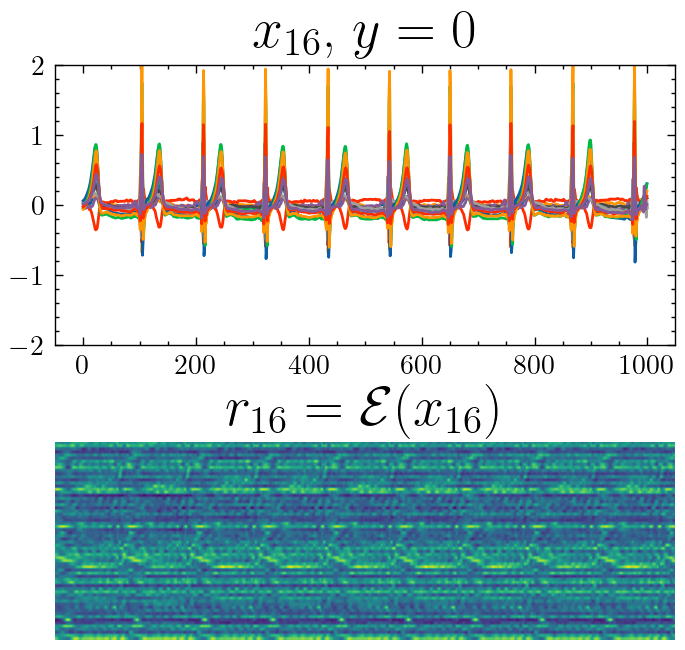

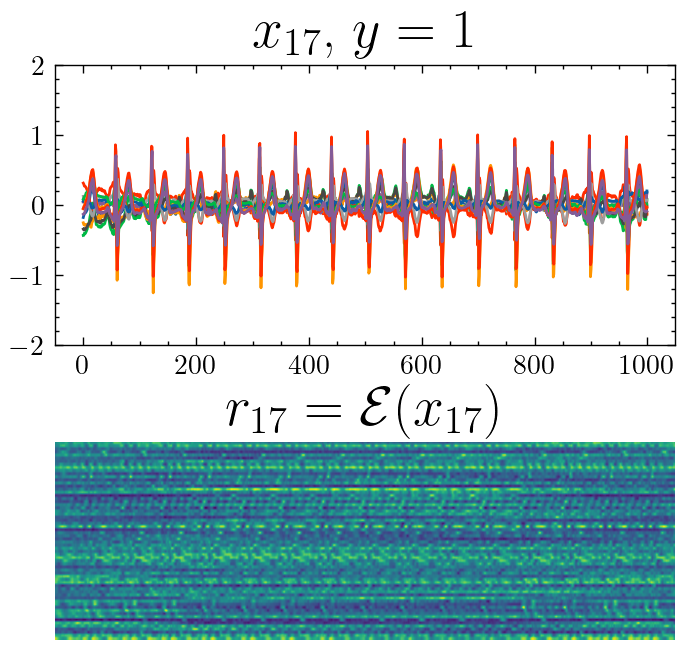

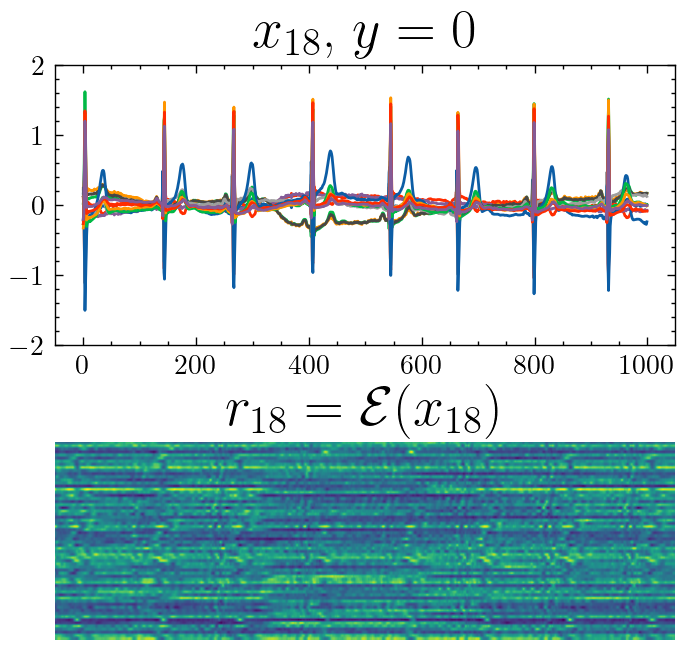

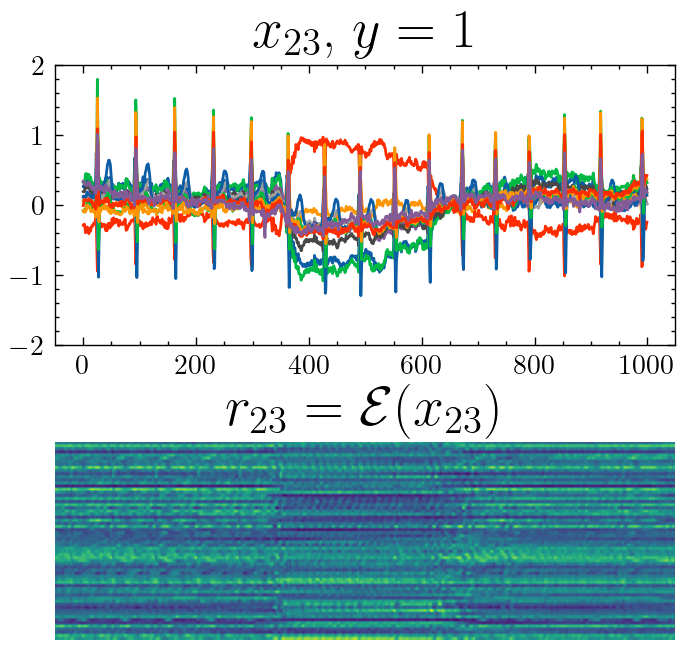

In [7]:
import matplotlib.pyplot as plt

from utils import cool_plots

import numpy as np

cool_plots()


N_images = 9

indices = [16,17,18, 23, 44, 49, 63, 68, 79, 102, 109, 124, 127, 134, 179, 214]

chosen_indice = [23, 44, 68, 127]

# np.random.seed(1)

# indices = np.random.choice(3000, size=N_images)

for i in range(len(chosen_indice)):
    fig, ax = plt.subplots(2,1, figsize=(4,4))

    X, y, _ = dataset[chosen_indice[i]]

    X_hat = model.model(X.float()[None,:,:])


    ax[0].plot(X)
    ax[0].set_title('$x_{' + str(indices[i]) + '}$,  ' + '$y=' + str(y.item()) + '$',
                    fontsize=20)
    ax[0].set_ylim(-2,2)

    ax[1].imshow(X_hat.detach().numpy().squeeze().T, aspect=5)
    ax[1].axis('off')
    ax[1].set_title('$r_{' + str(indices[i]) + '} = \mathcal{E}(x_{' + str(indices[i]) + '})$',
                    fontsize=20)

    #plt.show()
    plt.savefig(f'results/features/hand_picked/image_{indices[i]}')